# DIETARY ADVICE CLASSIFICATION

## DATA PROCESSING

In [1]:
#Importing data processing packages
import pandas as pd
import itertools

In [2]:
#Defining data path
dataset_path = r"C:\Users\SEOTECH\Downloads\dataset.xlsx"

In [3]:
#Reading the dataset from Excel files
dataset = pd.read_excel(dataset_path, sheet_name = 'DATASET', keep_default_na=False)

In [4]:
#Inspecting data
dataset.head()

,doc_no,annotator,struggle,cluster_micro_expert,cluster_macro_expert,cluster_macro,cluster_micro,struggle_original,age,country,...,reframing_from_expert,comfort_candidates,comfort_annotation,comfort_from_expert,suggestion_candidates,suggestion_annotation,suggestion_from_expert,reduced_embeddings,full_embeddings,text_mod
0,1,1,When dieting I often find it hard to track my ...,CALORIE_COUNTING,DIET_PLAN_ISSUES,find_calorie_time,find_calorie_diet,When dieting I often find it hard to track my ...,18-24,South Africa,...,N/A,It can happen to anyone to find it difficult t...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"Starting from tomorrow, you could try tracking...",N ### Y ### Y ### N ### Y ### N ### Y ### Y ##...,N/A,-0.38553035 ### 9.694216 ### 8.311511,-0.04257814213633537 ### 0.045637574046850204 ...,When dieting I often find it hard to track my<...
1,2,1,Saying no to alcohol in social settings. I usu...,SOCIAL,SOCIAL,feel_alcohol_friend,feel_drink_alcohol,Saying no to alcohol in social settings. I usu...,25-34,South Africa,...,N/A,It's understandable to struggle with saying no...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,Starting from tomorrow you could try setting a...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,1.6147285 ### 12.11944 ### 6.081849,0.021132370457053185 ### -0.020406601950526237...,Saying no to alcohol in social settings. I usu...
2,3,1,Healthy food is expensive and earning a middle...,SITUATIONAL,SITUATIONAL,feel_food_junk,tend_food_junk,Healthy food is expensive and earning a middle...,18-24,South Africa,...,N/A,It can happen to feel tempted to grab fast foo...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"Starting from tomorrow, you could make a list ...",N ### Y ### Y ### Y ### N ### Y ### Y ### Y ##...,N/A,-0.74341005 ### 14.221862 ### 9.163124,-0.0352167934179306 ### 0.06300564110279083 ##...,Healthy food is expensive and earning a middle...
3,4,1,Working out is hard for me because I'm used to...,MOTIVATION,MOTIVATION,feel_time_gym_day,work_habit_gym_life,Working out is hard for me because Im used to ...,18-24,Poland,...,N/A,It's understandable to find it difficult to ad...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"It could be helpful to set small, achievable g...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,4.136178 ### 9.765074 ### 7.860414,0.022051161155104637 ### -0.0497511550784111 #...,Working out is hard for me because I'm used to...
4,5,1,When I see pizza I always want to buy and I en...,CRAVING_HABIT,CRAVING_HABIT,feel_food_junk,buy_shopping_grocery_sweet,When I see pizza I always want to buy and I en...,18-24,South Africa,...,N/A,Sometimes it can happen that we crave certain ...,Y ### Y ### Y ### Y ### Y ### N ### Y ### Y ##...,N/A,"Starting from tomorrow, you could make a plan ...",N ### Y ### Y ### N ### Y ### Y ### Y ### Y ##...,N/A,-1.5897965 ### 13.701472 ### 7.329277,-0.009577570483088493 ### 0.09480103105306625 ...,When I see pizza I always want to buy and<br>I...


In [5]:
# splitting lists with ### separator and converting relevant columns to strings
for col in dataset.columns:
    if type(dataset[col][0]) == str:
        if dataset[col].str.contains(" ### ").any():
            new_col = dataset[col].str.split(" ### ")
            dataset[col] = new_col

In [6]:
#Inspecting dataset
dataset.head()

,doc_no,annotator,struggle,cluster_micro_expert,cluster_macro_expert,cluster_macro,cluster_micro,struggle_original,age,country,...,reframing_from_expert,comfort_candidates,comfort_annotation,comfort_from_expert,suggestion_candidates,suggestion_annotation,suggestion_from_expert,reduced_embeddings,full_embeddings,text_mod
0,1,1,When dieting I often find it hard to track my ...,CALORIE_COUNTING,DIET_PLAN_ISSUES,find_calorie_time,find_calorie_diet,When dieting I often find it hard to track my ...,18-24,South Africa,...,[N/A],[It can happen to anyone to find it difficult ...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could try trackin...","[N, Y, Y, N, Y, N, Y, Y, Y, Y]",[N/A],"[-0.38553035, 9.694216, 8.311511]","[-0.04257814213633537, 0.045637574046850204, 0...",When dieting I often find it hard to track my<...
1,2,1,Saying no to alcohol in social settings. I usu...,SOCIAL,SOCIAL,feel_alcohol_friend,feel_drink_alcohol,Saying no to alcohol in social settings. I usu...,25-34,South Africa,...,[N/A],[It's understandable to struggle with saying n...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[Starting from tomorrow you could try setting ...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[1.6147285, 12.11944, 6.081849]","[0.021132370457053185, -0.020406601950526237, ...",Saying no to alcohol in social settings. I usu...
2,3,1,Healthy food is expensive and earning a middle...,SITUATIONAL,SITUATIONAL,feel_food_junk,tend_food_junk,Healthy food is expensive and earning a middle...,18-24,South Africa,...,[N/A],[It can happen to feel tempted to grab fast fo...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could make a list...","[N, Y, Y, Y, N, Y, Y, Y, Y, Y]",[N/A],"[-0.74341005, 14.221862, 9.163124]","[-0.0352167934179306, 0.06300564110279083, 0.0...",Healthy food is expensive and earning a middle...
3,4,1,Working out is hard for me because I'm used to...,MOTIVATION,MOTIVATION,feel_time_gym_day,work_habit_gym_life,Working out is hard for me because Im used to ...,18-24,Poland,...,[N/A],[It's understandable to find it difficult to a...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[It could be helpful to set small, achievable ...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[4.136178, 9.765074, 7.860414]","[0.022051161155104637, -0.0497511550784111, 0....",Working out is hard for me because I'm used to...
4,5,1,When I see pizza I always want to buy and I en...,CRAVING_HABIT,CRAVING_HABIT,feel_food_junk,buy_shopping_grocery_sweet,When I see pizza I always want to buy and I en...,18-24,South Africa,...,[N/A],[Sometimes it can happen that we crave certain...,"[Y, Y, Y, Y, Y, N, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could make a plan...","[N, Y, Y, N, Y, Y, Y, Y, Y, Y]",[N/A],"[-1.5897965, 13.701472, 7.329277]","[-0.009577570483088493, 0.09480103105306625, 0...",When I see pizza I always want to buy and<br>I...


## CLASSIFICATION TASK

### SUPPORT VECTOR MACHINE 

In [7]:
#Importing packages
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### CLASSIFYING REFLECTION CANDIDATES

In [8]:
#Reading the reflection candidates into a list
statements = []
labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['reflection_candidates'], row['reflection_annotation']):
        statements.append(statement)
        labels.append(1 if annotation == 'Y' else 0)

In [9]:
# Counting the number of statements
num_statements = len(statements)
print(f"Number of statements: {num_statements}")

# Counting the number of labels
num_labels = len(labels)
print(f"Number of labels: {num_labels}")

# Counting the occurrences of each class
num_safe = labels.count(1)  # 1 represents 'Y' for safe
num_unsafe = labels.count(0)  # 0 represents 'N' for unsafe
print(f"Number of safe statements (Y): {num_safe}")
print(f"Number of unsafe statements (N): {num_unsafe}")

Number of statements: 24200
Number of labels: 24200
Number of safe statements (Y): 20377
Number of unsafe statements (N): 3823


In [10]:
# Printing three sample statements with their labels
print("Sample statements with labels:")
for i in range(3): 
    print(f"Statement {i+1}: {statements[i]} - Label: {'Safe' if labels[i] == 1 else 'Unsafe'}")

Sample statements with labels:
Statement 1: So, do you mean that tracking your calorie intake is difficult because food packaging does not always have the information? - Label: Safe
Statement 2: So, are you saying that it can be tedious to track every calorie consumed? - Label: Safe
Statement 3: So, do you mean that you find it challenging to maintain a calorie surplus while dieting? - Label: Safe


In [11]:
# Vectorizing the statements using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(statements)

In [12]:
# Converting labels to an array
y = pd.Series(labels)

In [13]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Training the SVM classifier 
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
# Predicting on the test set and evaluating accuracy
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8415289256198347


Confusion Matrix:
[[  44  756]
 [  11 4029]]


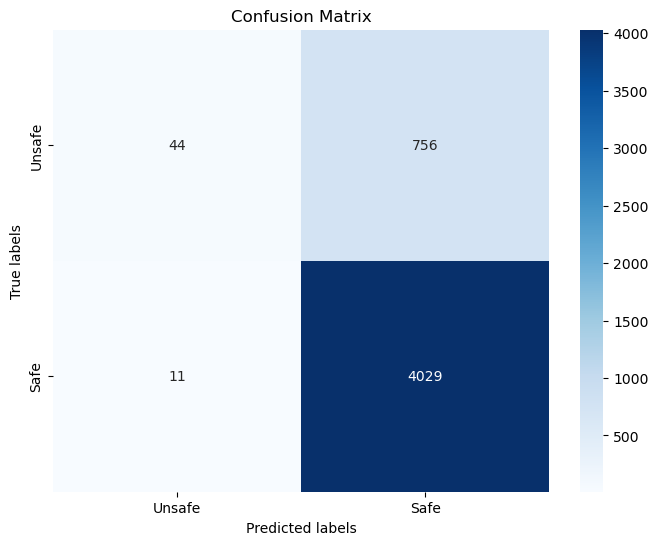

In [16]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Balanced Accuracy: 0.5261386138613862


In [18]:
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"])

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.80      0.06      0.10       800
        Safe       0.84      1.00      0.91      4040

    accuracy                           0.84      4840
   macro avg       0.82      0.53      0.51      4840
weighted avg       0.84      0.84      0.78      4840



#### CLASSIFYING COMFORT CANDIDATES

In [19]:
#Reading the comfort candidates into a list
statements = []
labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['comfort_candidates'], row['comfort_annotation']):
        statements.append(statement)
        labels.append(1 if annotation == 'Y' else 0)

In [20]:
# Counting the number of statements
num_statements = len(statements)
print(f"Number of statements: {num_statements}")

# Counting the number of labels
num_labels = len(labels)
print(f"Number of labels: {num_labels}")

# Counting the occurrences of each class
num_safe = labels.count(1)  # 1 represents 'Y' for safe
num_unsafe = labels.count(0)  # 0 represents 'N' for unsafe
print(f"Number of safe statements (Y): {num_safe}")
print(f"Number of unsafe statements (N): {num_unsafe}")

Number of statements: 24200
Number of labels: 24200
Number of safe statements (Y): 19371
Number of unsafe statements (N): 4829


In [21]:
# Printing three sample statements with their labels
print("Sample statements with labels:")
for i in range(3): 
    print(f"Statement {i+1}: {statements[i]} - Label: {'Safe' if labels[i] == 1 else 'Unsafe'}")

Sample statements with labels:
Statement 1: It can happen to anyone to find it difficult to track calories when dieting, as not all food packages include this information and tracking every calorie can be tedious.  - Label: Safe
Statement 2: It can happen to find it hard to maintain a calorie surplus when trying to track every calorie, as it can be a lot of work to do so.  - Label: Safe
Statement 3: It can happen to feel frustrated when trying to track every calorie, especially when food packages do not include this information.  - Label: Safe


In [22]:
# Vectorizing the statements using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(statements)

In [23]:
# Converting labels to an array
y = pd.Series(labels)

In [24]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Training the SVM classifier 
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
# Predicting on the test set and evaluating accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Accuracy: 0.8008264462809918
Balanced Accuracy: 0.5174797548789484


Confusion Matrix:
[[  37  955]
 [   9 3839]]


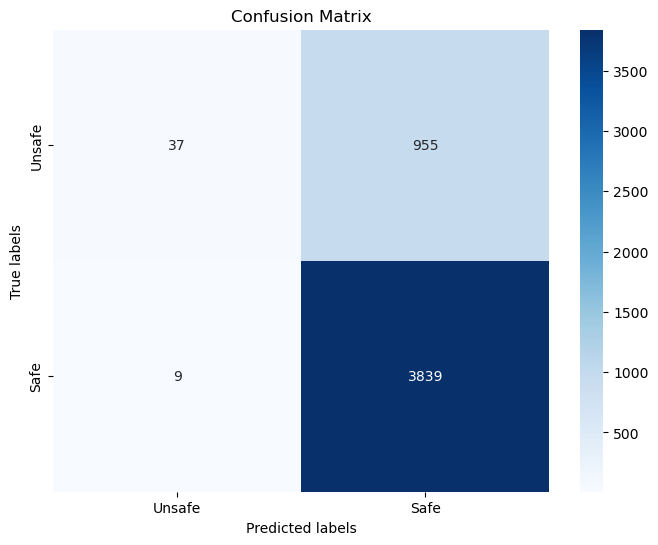

In [27]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"])

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.80      0.04      0.07       992
        Safe       0.80      1.00      0.89      3848

    accuracy                           0.80      4840
   macro avg       0.80      0.52      0.48      4840
weighted avg       0.80      0.80      0.72      4840



#### CLASSIFYING REFRAMING CANDIDATES

In [29]:
#Reading the reframing candidates into a list
statements = []
labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['reframing_candidates'], row['reframing_annotation']):
        statements.append(statement)
        labels.append(1 if annotation == 'Y' else 0)

In [30]:
# Counting the number of statements
num_statements = len(statements)
print(f"Number of statements: {num_statements}")

# Counting the number of labels
num_labels = len(labels)
print(f"Number of labels: {num_labels}")

# Counting the occurrences of each class
num_safe = labels.count(1)  # 1 represents 'Y' for safe
num_unsafe = labels.count(0)  # 0 represents 'N' for unsafe
print(f"Number of safe statements (Y): {num_safe}")
print(f"Number of unsafe statements (N): {num_unsafe}")

Number of statements: 24200
Number of labels: 24200
Number of safe statements (Y): 19736
Number of unsafe statements (N): 4464


In [31]:
# Printing three sample statements with their labels
print("Sample statements with labels:")
for i in range(3): 
    print(f"Statement {i+1}: {statements[i]} - Label: {'Safe' if labels[i] == 1 else 'Unsafe'}")

Sample statements with labels:
Statement 1: How about seeing it this way for a minute: tracking your calories is an opportunity to learn more about the foods you're consuming. - Label: Safe
Statement 2: How about seeing it this way for a minute: tracking your calories is a way to gain control over your eating habits and make more informed choices. - Label: Safe
Statement 3: Something positive you could consider about this is that tracking your calories is a tool for weight loss, muscle gain and body composition goals. - Label: Safe


In [32]:
# Vectorizing the statements using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(statements)

In [33]:
# Converting labels to an array
y = pd.Series(labels)

In [34]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Training the SVM classifier 
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
# Predicting on the test set and evaluating accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Accuracy: 0.8214876033057851
Balanced Accuracy: 0.5206507725042063


Confusion Matrix:
[[  38  860]
 [   4 3938]]


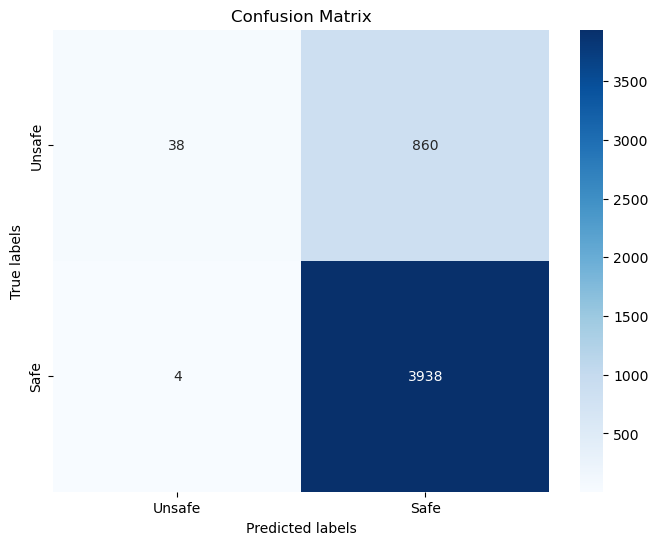

In [37]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"])

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.90      0.04      0.08       898
        Safe       0.82      1.00      0.90      3942

    accuracy                           0.82      4840
   macro avg       0.86      0.52      0.49      4840
weighted avg       0.84      0.82      0.75      4840



#### CLASSIFYING SUGGESTION CANDIDATES

In [42]:
#Reading the suggestion candidates into a list
statements = []
labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['suggestion_candidates'], row['suggestion_annotation']):
        statements.append(statement)
        labels.append(1 if annotation == 'Y' else 0)

In [43]:
# Counting the number of statements
num_statements = len(statements)
print(f"Number of statements: {num_statements}")

# Counting the number of labels
num_labels = len(labels)
print(f"Number of labels: {num_labels}")

# Counting the occurrences of each class
num_safe = labels.count(1)  # 1 represents 'Y' for safe
num_unsafe = labels.count(0)  # 0 represents 'N' for unsafe
print(f"Number of safe statements (Y): {num_safe}")
print(f"Number of unsafe statements (N): {num_unsafe}")

Number of statements: 24200
Number of labels: 24200
Number of safe statements (Y): 20164
Number of unsafe statements (N): 4036


In [44]:
# Printing three sample statements with their labels
print("Sample statements with labels:")
for i in range(3): 
    print(f"Statement {i+1}: {statements[i]} - Label: {'Safe' if labels[i] == 1 else 'Unsafe'}")

Sample statements with labels:
Statement 1: Starting from tomorrow, you could try tracking your calories for just one meal a day, and gradually increase the number of meals as you get more comfortable with it. - Label: Unsafe
Statement 2: It could be helpful to invest in a food scale or a calorie tracking app to make the process easier. - Label: Safe
Statement 3: It could be helpful to focus on tracking the macronutrients (carbs, proteins, fats) instead of every single calorie. - Label: Safe


In [45]:
# Vectorizing the statements using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(statements)

In [46]:
# Converting labels to an array
y = pd.Series(labels)

In [47]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Training the SVM classifier 
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
# Predicting on the test set and evaluating accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Accuracy: 0.8314049586776859
Balanced Accuracy: 0.5063012513054578


Confusion Matrix:
[[  11  813]
 [   3 4013]]


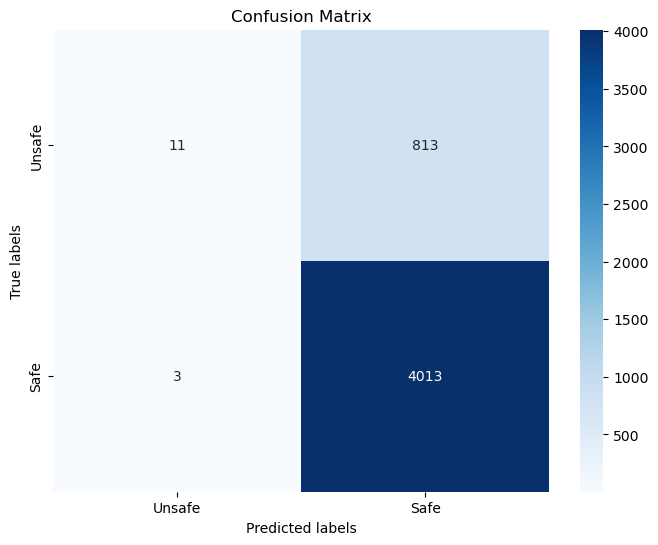

In [50]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [51]:
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"])

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.79      0.01      0.03       824
        Safe       0.83      1.00      0.91      4016

    accuracy                           0.83      4840
   macro avg       0.81      0.51      0.47      4840
weighted avg       0.82      0.83      0.76      4840



### NAIVE BAYES

In [52]:
from sklearn.naive_bayes import MultinomialNB

#### CLASSIFYING REFLECTION CANDIDATES

In [53]:
#Reading the reflection candidates into a list
statements = []
labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['reflection_candidates'], row['reflection_annotation']):
        statements.append(statement)
        labels.append(1 if annotation == 'Y' else 0)

In [54]:
# Counting the number of statements
num_statements = len(statements)
print(f"Number of statements: {num_statements}")

# Counting the number of labels
num_labels = len(labels)
print(f"Number of labels: {num_labels}")

# Counting the occurrences of each class
num_safe = labels.count(1)  # 1 represents 'Y' for safe
num_unsafe = labels.count(0)  # 0 represents 'N' for unsafe
print(f"Number of safe statements (Y): {num_safe}")
print(f"Number of unsafe statements (N): {num_unsafe}")

Number of statements: 24200
Number of labels: 24200
Number of safe statements (Y): 20377
Number of unsafe statements (N): 3823


In [55]:
# Printing three sample statements with their labels
print("Sample statements with labels:")
for i in range(3): 
    print(f"Statement {i+1}: {statements[i]} - Label: {'Safe' if labels[i] == 1 else 'Unsafe'}")

Sample statements with labels:
Statement 1: So, do you mean that tracking your calorie intake is difficult because food packaging does not always have the information? - Label: Safe
Statement 2: So, are you saying that it can be tedious to track every calorie consumed? - Label: Safe
Statement 3: So, do you mean that you find it challenging to maintain a calorie surplus while dieting? - Label: Safe


In [56]:
# Vectorizing the statements using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(statements)

In [57]:
# Converting labels to an array
y = pd.Series(labels)

In [58]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Training the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [60]:
# Predicting on the test set and evaluating accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Accuracy: 0.8398760330578512
Balanced Accuracy: 0.5186324257425743


Confusion Matrix:
[[  31  769]
 [   6 4034]]


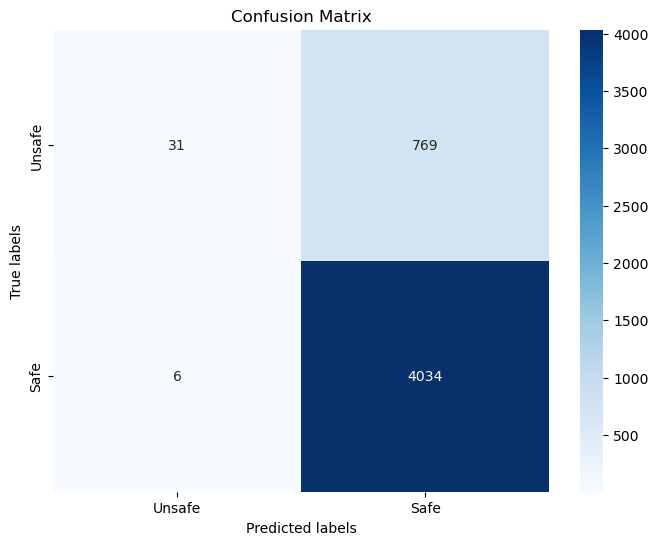

In [61]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"])

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.84      0.04      0.07       800
        Safe       0.84      1.00      0.91      4040

    accuracy                           0.84      4840
   macro avg       0.84      0.52      0.49      4840
weighted avg       0.84      0.84      0.77      4840



#### CLASSIFYING COMFORT CANDIDATES

In [63]:
#Reading the comfort candidates into a list
statements = []
labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['comfort_candidates'], row['comfort_annotation']):
        statements.append(statement)
        labels.append(1 if annotation == 'Y' else 0)

In [64]:
# Counting the number of statements
num_statements = len(statements)
print(f"Number of statements: {num_statements}")

# Counting the number of labels
num_labels = len(labels)
print(f"Number of labels: {num_labels}")

# Counting the occurrences of each class
num_safe = labels.count(1)  # 1 represents 'Y' for safe
num_unsafe = labels.count(0)  # 0 represents 'N' for unsafe
print(f"Number of safe statements (Y): {num_safe}")
print(f"Number of unsafe statements (N): {num_unsafe}")

Number of statements: 24200
Number of labels: 24200
Number of safe statements (Y): 19371
Number of unsafe statements (N): 4829


In [65]:
# Printing three sample statements with their labels
print("Sample statements with labels:")
for i in range(3): 
    print(f"Statement {i+1}: {statements[i]} - Label: {'Safe' if labels[i] == 1 else 'Unsafe'}")

Sample statements with labels:
Statement 1: It can happen to anyone to find it difficult to track calories when dieting, as not all food packages include this information and tracking every calorie can be tedious.  - Label: Safe
Statement 2: It can happen to find it hard to maintain a calorie surplus when trying to track every calorie, as it can be a lot of work to do so.  - Label: Safe
Statement 3: It can happen to feel frustrated when trying to track every calorie, especially when food packages do not include this information.  - Label: Safe


In [66]:
# Vectorizing the statements using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(statements)

In [67]:
# Converting labels to an array
y = pd.Series(labels)

In [68]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Training the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [70]:
# Predicting on the test set and evaluating accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Accuracy: 0.8012396694214876
Balanced Accuracy: 0.5192360086513312


Confusion Matrix:
[[  41  951]
 [  11 3837]]


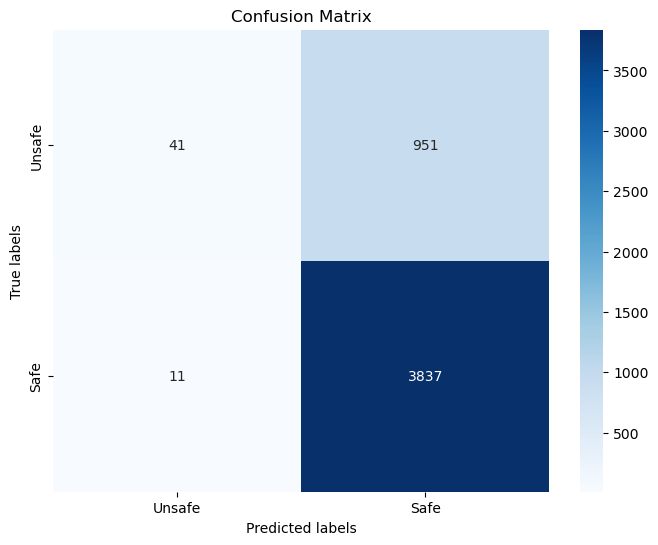

In [71]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"])

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.79      0.04      0.08       992
        Safe       0.80      1.00      0.89      3848

    accuracy                           0.80      4840
   macro avg       0.79      0.52      0.48      4840
weighted avg       0.80      0.80      0.72      4840



### REGRESSION MODEL

In [73]:
from sklearn.linear_model import LogisticRegression

#### CLASSIFYING REFLECTION CANDIDATES

In [74]:
#Reading the reflection candidates into a list
statements = []
labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['reflection_candidates'], row['reflection_annotation']):
        statements.append(statement)
        labels.append(1 if annotation == 'Y' else 0)

In [75]:
# Counting the number of statements
num_statements = len(statements)
print(f"Number of statements: {num_statements}")

# Counting the number of labels
num_labels = len(labels)
print(f"Number of labels: {num_labels}")

# Counting the occurrences of each class
num_safe = labels.count(1)  # 1 represents 'Y' for safe
num_unsafe = labels.count(0)  # 0 represents 'N' for unsafe
print(f"Number of safe statements (Y): {num_safe}")
print(f"Number of unsafe statements (N): {num_unsafe}")

Number of statements: 24200
Number of labels: 24200
Number of safe statements (Y): 20377
Number of unsafe statements (N): 3823


In [76]:
# Printing three sample statements with their labels
print("Sample statements with labels:")
for i in range(3): 
    print(f"Statement {i+1}: {statements[i]} - Label: {'Safe' if labels[i] == 1 else 'Unsafe'}")

Sample statements with labels:
Statement 1: So, do you mean that tracking your calorie intake is difficult because food packaging does not always have the information? - Label: Safe
Statement 2: So, are you saying that it can be tedious to track every calorie consumed? - Label: Safe
Statement 3: So, do you mean that you find it challenging to maintain a calorie surplus while dieting? - Label: Safe


In [77]:
# Vectorizing the statements using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(statements)
y = labels

In [78]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Initializing the Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)

# Training the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [80]:
# Predicting on the test set and evaluating accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Accuracy: 0.840702479338843
Balanced Accuracy: 0.5206311881188119


Confusion Matrix:
[[  34  766]
 [   5 4035]]


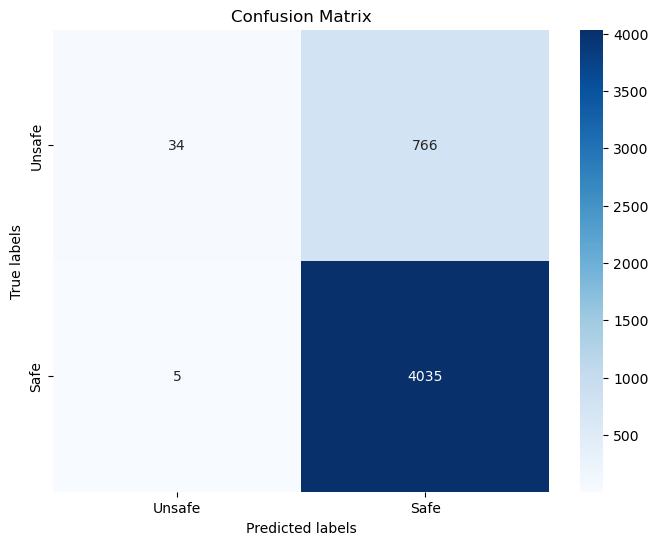

In [81]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [82]:
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"])

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.87      0.04      0.08       800
        Safe       0.84      1.00      0.91      4040

    accuracy                           0.84      4840
   macro avg       0.86      0.52      0.50      4840
weighted avg       0.85      0.84      0.78      4840



#### CLASSIFYING COMFORT CANDIDATES

In [83]:
#Reading the comfort candidates into a list
statements = []
labels = []
for index, row in dataset.iterrows():
    for statement, annotation in zip(row['comfort_candidates'], row['comfort_annotation']):
        statements.append(statement)
        labels.append(1 if annotation == 'Y' else 0)

In [84]:
# Counting the number of statements
num_statements = len(statements)
print(f"Number of statements: {num_statements}")

# Counting the number of labels
num_labels = len(labels)
print(f"Number of labels: {num_labels}")

# Counting the occurrences of each class
num_safe = labels.count(1)  # 1 represents 'Y' for safe
num_unsafe = labels.count(0)  # 0 represents 'N' for unsafe
print(f"Number of safe statements (Y): {num_safe}")
print(f"Number of unsafe statements (N): {num_unsafe}")

Number of statements: 24200
Number of labels: 24200
Number of safe statements (Y): 19371
Number of unsafe statements (N): 4829


In [85]:
# Printing three sample statements with their labels
print("Sample statements with labels:")
for i in range(3): 
    print(f"Statement {i+1}: {statements[i]} - Label: {'Safe' if labels[i] == 1 else 'Unsafe'}")

Sample statements with labels:
Statement 1: It can happen to anyone to find it difficult to track calories when dieting, as not all food packages include this information and tracking every calorie can be tedious.  - Label: Safe
Statement 2: It can happen to find it hard to maintain a calorie surplus when trying to track every calorie, as it can be a lot of work to do so.  - Label: Safe
Statement 3: It can happen to feel frustrated when trying to track every calorie, especially when food packages do not include this information.  - Label: Safe


In [86]:
# Vectorizing the statements using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(statements)
y = labels

In [87]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Initializing the Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)

# Training the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [89]:
# Predicting on the test set and evaluating accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Accuracy: 0.7981404958677686
Balanced Accuracy: 0.5146682818053786


Confusion Matrix:
[[  34  958]
 [  19 3829]]


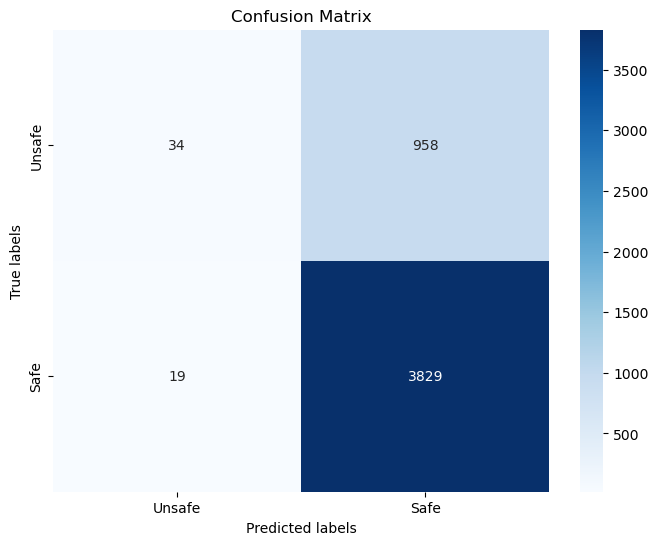

In [90]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unsafe", "Safe"], yticklabels=["Unsafe", "Safe"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [91]:
from sklearn.metrics import classification_report

# Generating the classification report
report = classification_report(y_test, y_pred, target_names=["Unsafe", "Safe"])

# Printing the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Unsafe       0.64      0.03      0.07       992
        Safe       0.80      1.00      0.89      3848

    accuracy                           0.80      4840
   macro avg       0.72      0.51      0.48      4840
weighted avg       0.77      0.80      0.72      4840

